In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import ast

In [ ]:
df = pd.read_csv('/content/data_pengujian.csv')

In [ ]:
df.head()

,user_id,created_at,name,kategori,role_desc,umur,gender,domisili,INN-CE1,SE-M1,...,rec_single,rec_hybrid,top3_sector_single,top3_sector_hybrid,rate_single,chosen_s_list,feedback_single,rate_hybrid,chosen_h_list,feedback_hybrid
0,f2ad078e,05/01/2026 15:31,M Sirajudin Suyuti,Calon Wirausahawan,Puffella,20,Laki-laki,Kota Jakarta Barat,4,5,...,Focused Tech Innovators,Dynamic Knowledge Innovators,"Non-High Tech Manufacturing, Cutting-Edge Tech...","Cutting-Edge Technology Manufacturing, Softwar...",3,Non-High Tech Manufacturing,Masukkan: Terdapat beberapa poin yang bertolak...,4,Technology Intensive Services,Masukkan: Terdapat beberapa poin yang bertolak...
1,6795bb34,05/01/2026 14:28,Derrick,Calon Wirausahawan,Mochi protein,18,Laki-laki,Kota Jakarta Barat,4,4,...,"Multidimensional Service Innovators, Adaptive ...","Multidimensional Service Innovators, Adaptive ...","Technology Intensive Services, Skill-Intensive...","Skill-Intensive Services, Technology Intensive...",4,Skill-Intensive Services,"semua descriptionnya oke, tapi di sector techn...",5,Skill-Intensive Services,semua descriptionnya sesuaii termasuk recomend...
2,ec1b26dd,05/01/2026 15:24,Ruben,Calon Wirausahawan,Ruben's Bar,28,Laki-laki,Kabupaten Puncak Jaya,5,5,...,"Focused Tech Innovators, Dynamic Knowledge Inn...",Dynamic Knowledge Innovators,"Non-High Tech Manufacturing, Cutting-Edge Tech...","Cutting-Edge Technology Manufacturing, Softwar...",5,High Technology Manufacturing,Saya merasa sistem ini dapat saya terapkan den...,3,High Technology Manufacturing,"Saya kurang cocok dengan sistem ini, saya lebi..."
3,f3af315e,05/01/2026 11:30,Edbert,Calon Wirausahawan,Aplikasi dating untuk hewan (bumble untuk hewan),21,Laki-laki,Kota Tegal,2,3,...,Multidimensional Service Innovators,Dynamic Knowledge Innovators,"Consumer Oriented Services, Skill-Intensive Se...","Skill-Intensive Services, Software, Cutting-Ed...",4,Consumer Oriented Services,-,4,Cutting-Edge Technology Manufacturing,-
4,d9ee2911,05/01/2026 04:14,gaby,Pelajar/Mahasiswa,Data Science,20,Perempuan,Kota Jakarta Barat,5,4,...,"Adaptive Services, Multidimensional Service In...",Multidimensional Service Innovators,"Consumer Oriented Services, Non-High Tech Manu...","Skill-Intensive Services, Construction, Consum...",4,Other Business Services,Pilihannya cukup relevan karena fokus saya mem...,5,Skill-Intensive Services,"Sangat akurat, karena kategori ini menggambark..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             84 non-null     object
 1   created_at          84 non-null     object
 2   name                84 non-null     object
 3   kategori            84 non-null     object
 4   role_desc           84 non-null     object
 5   umur                84 non-null     int64 
 6   gender              84 non-null     object
 7   domisili            84 non-null     object
 8   INN-CE1             84 non-null     int64 
 9   SE-M1               84 non-null     int64 
 10  NACH-FF2            84 non-null     int64 
 11  LOC-I1              84 non-null     int64 
 12  SE-P2               84 non-null     int64 
 13  INN-O2              84 non-null     int64 
 14  SE-IP1              84 non-null     int64 
 15  NACH-HS1            84 non-null     int64 
 16  SE-IF1              84 non-n

In [ ]:
df.columns

Index(['user_id', 'created_at', 'name', 'kategori', 'role_desc', 'umur',
       'gender', 'domisili', 'INN-CE1', 'SE-M1', 'NACH-FF2', 'LOC-I1', 'SE-P2',
       'INN-O2', 'SE-IP1', 'NACH-HS1', 'SE-IF1', 'LOC-E2', 'SE-S1', 'INN-W1',
       'NACH-HS2', 'SE-IF2', 'INN-CE2', 'LOC-E1', 'SE-M2', 'SE-S2', 'LOC-I2',
       'INN-W2', 'SE-P1', 'INN-O1', 'SE-IP2', 'NACH-FF1', 'CON-2', 'OPE-3',
       'NEU-1', 'AGR-2', 'EXT-2', 'CON-1', 'OPE-1', 'AGR-1', 'NEU-3', 'EXT-3',
       'OPE-2', 'AGR-3', 'NEU-2', 'CON-3', 'EXT-1', 'rec_single', 'rec_hybrid',
       'top3_sector_single', 'top3_sector_hybrid', 'rate_single',
       'chosen_s_list', 'feedback_single', 'rate_hybrid', 'chosen_h_list',
       'feedback_hybrid'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
user_id,0
created_at,0
name,0
kategori,0
role_desc,0
umur,0
gender,0
domisili,0
INN-CE1,0
SE-M1,0


STATISTIK DESKRIPTIF

In [ ]:
df[['rate_single', 'rate_hybrid']].describe()

,rate_single,rate_hybrid
count,84.000000,84.000000
mean,4.095238,3.833333
std,0.844815,0.967338
min,1.000000,1.000000
25%,4.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [ ]:
df['rate_single'].value_counts().sort_index()

,count
rate_single,
1,1
2,2
3,14
4,38
5,29


In [ ]:
df['rate_hybrid'].value_counts().sort_index()

,count
rate_hybrid,
1,1
2,6
3,23
4,30
5,24


DISTRIBUSI RESPONDEN

In [ ]:
df['kategori'].value_counts()

,count
kategori,
Pelajar/Mahasiswa,22
Pelaku UMKM,21
Profesional,21
Calon Wirausahawan,20


In [ ]:
df['domisili'].value_counts()

,count
domisili,
Kota Palembang,27
Kota Jakarta Barat,12
Kota Surabaya,8
Kota Tangerang Selatan,6
Kota Tangerang,5
Kota Jakarta Selatan,5
Kabupaten Tangerang,2
Kota Jakarta Utara,2
Kota Depok,2


In [ ]:
df['gender'].value_counts()

,count
gender,
Laki-laki,44
Perempuan,40


In [ ]:
df['umur'].describe()

,umur
count,84.000000
mean,31.750000
std,13.667193
min,18.000000
25%,21.000000
50%,23.500000
75%,45.000000
max,65.000000


VISUALISASI RATING

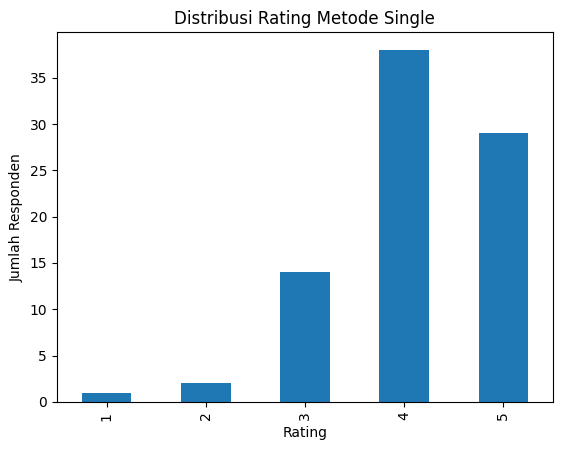

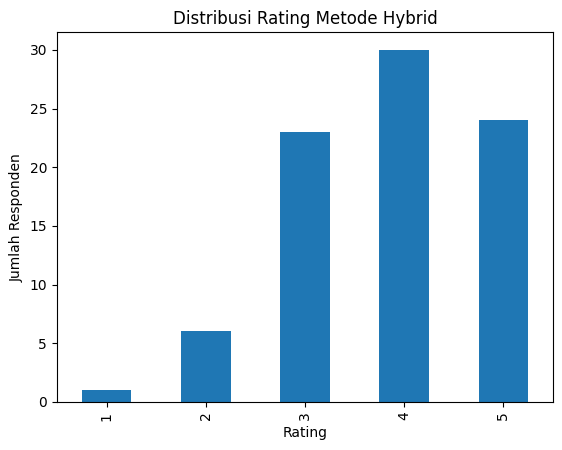

In [ ]:
df['rate_single'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Rating Metode Single')
plt.xlabel('Rating')
plt.ylabel('Jumlah Responden')
plt.show()

df['rate_hybrid'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Rating Metode Hybrid')
plt.xlabel('Rating')
plt.ylabel('Jumlah Responden')
plt.show()

PREFERENCE MATCH

In [ ]:
def is_in_top3(row, col_top3, col_choice):
    if pd.isna(row[col_choice]):
        return 0
    return int(row[col_choice] in row[col_top3])

df['match_single'] = df.apply(lambda x: is_in_top3(x, 'top3_sector_single', 'chosen_s_list'), axis=1)
df['match_hybrid'] = df.apply(lambda x: is_in_top3(x, 'top3_sector_hybrid', 'chosen_h_list'), axis=1)

df[['match_single', 'match_hybrid']].mean()

,0
match_single,0.880952
match_hybrid,0.845238


ANALISIS SEKTOR DOMINAN

In [ ]:
df['chosen_s_list'].value_counts()

,count
chosen_s_list,
Consumer Oriented Services,25
Skill-Intensive Services,9
Other Business Services,8
Non-High Tech Manufacturing,6
High Technology Manufacturing,5
Cutting-Edge Technology Manufacturing,4
Technology Intensive Services,4
Wholesale And Retail Market,3
Construction,2


In [ ]:
df['chosen_h_list'].value_counts()

,count
chosen_h_list,
Skill-Intensive Services,23
Consumer Oriented Services,13
High Technology Manufacturing,8
Software,7
Cutting-Edge Technology Manufacturing,5
Construction,4
Technology Intensive Services,3
Wholesale And Retail Market,3
"Skill-Intensive Services, Consumer Oriented Services",2


ANALISIS PER POPULASI

In [ ]:
df.groupby('kategori')[['rate_single', 'rate_hybrid']].mean()

,rate_single,rate_hybrid
kategori,,
Calon Wirausahawan,4.050000,4.000000
Pelajar/Mahasiswa,4.181818,3.818182
Pelaku UMKM,4.000000,3.857143
Profesional,4.142857,3.666667


GAP ANALYSIS (SINGLE vs HYBRID PER USER)

In [ ]:
df['gap_rating'] = df['rate_single'] - df['rate_hybrid']
df['gap_rating'].describe()

,gap_rating
count,84.000000
mean,0.261905
std,1.109858
min,-4.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


In [ ]:
df['gap_rating'].value_counts().sort_index()

,count
gap_rating,
-4,1
-2,1
-1,10
0,49
1,12
2,8
3,2
4,1


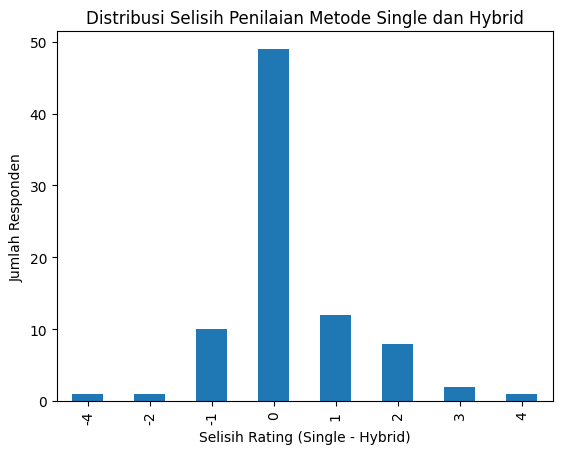

In [ ]:
df['gap_rating'] = df['rate_single'] - df['rate_hybrid']
gap_counts = df['gap_rating'].value_counts().sort_index()

plt.figure()
gap_counts.plot(kind='bar')
plt.xlabel('Selisih Rating (Single - Hybrid)')
plt.ylabel('Jumlah Responden')
plt.title('Distribusi Selisih Penilaian Metode Single dan Hybrid')
plt.show()

Perbandingan per KATEGORI pengguna

In [ ]:
df.groupby('kategori')[['rate_single', 'rate_hybrid']].mean()

,rate_single,rate_hybrid
kategori,,
Calon Wirausahawan,4.050000,4.000000
Pelajar/Mahasiswa,4.181818,3.818182
Pelaku UMKM,4.000000,3.857143
Profesional,4.142857,3.666667


Preferensi individual

In [ ]:
(df['rate_single'] > df['rate_hybrid']).mean()

np.float64(0.27380952380952384)

In [ ]:
(df['rate_single'] < df['rate_hybrid']).mean()

np.float64(0.14285714285714285)

In [ ]:
(df['rate_single'] == df['rate_hybrid']).mean()

np.float64(0.5833333333333334)

HUBUNGAN PERSEPSI & RELEVANSI

In [ ]:
df.groupby('match_single')['rate_single'].mean()

,rate_single
match_single,
0,4.000000
1,4.108108


In [ ]:
df.groupby('match_hybrid')['rate_hybrid'].mean()

,rate_hybrid
match_hybrid,
0,4.230769
1,3.760563


##

# FEEDBACK ANALYSIS

PEMBERSIHAN FEEDBACK

In [ ]:
feedback_all = pd.concat([
    df['feedback_single'].dropna(),
    df['feedback_hybrid'].dropna()
])

words = ' '.join(feedback_all).lower().split()
Counter(words).most_common(15)

[('saya', 78),
 ('yang', 63),
 ('dengan', 38),
 ('lebih', 37),
 ('dan', 35),
 ('untuk', 30),
 ('baik', 27),
 ('ada', 25),
 ('sangat', 25),
 ('ini', 22),
 ('dalam', 22),
 ('tidak', 20),
 ('di', 20),
 ('sudah', 19),
 ('sesuai', 19)]

In [ ]:
def clean_text(text):
    if pd.isna(text):
        return ''
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [ ]:
df['feedback_single_clean'] = df['feedback_single'].fillna('').astype(str)
df['feedback_hybrid_clean'] = df['feedback_hybrid'].fillna('').astype(str)

## ANALISIS TEMA SEDERHANA

Buat KAMUS TEMA

In [ ]:
themes = {
    'Kesesuaian': ['sesuai', 'cocok', 'relevan', 'akurat'],
    'Kejelasan': ['jelas', 'detail', 'penjelasan', 'deskripsi'],
    'Manfaat': ['membantu', 'berguna', 'bermanfaat', 'terapan'],
    'Ketidaksesuaian': ['kurang', 'tidak', 'beda', 'bingung']
}

HITUNG KEMUNCULAN TEMA

In [ ]:
def count_themes(text_series, themes):
    theme_counter = Counter()
    for text in text_series:
        for theme, keywords in themes.items():
            if any(word in text for word in keywords):
                theme_counter[theme] += 1
    return theme_counter

In [ ]:
df['feedback_single_clean'] = df['feedback_single'].dropna().apply(clean_text)
df['feedback_hybrid_clean'] = df['feedback_hybrid'].dropna().apply(clean_text)

FUNGSI COUNT TEMA

In [ ]:
def count_themes(text_series, themes):
    theme_counter = Counter()
    for text in text_series:
        if not isinstance(text, str) or text.strip() == '':
            continue
        for theme, keywords in themes.items():
            for word in keywords:
                if word in text:
                    theme_counter[theme] += 1
                    break
    return theme_counter

In [ ]:
theme_single = count_themes(df['feedback_single_clean'], themes)
theme_hybrid = count_themes(df['feedback_hybrid_clean'], themes)

In [ ]:
theme_single, theme_hybrid

(Counter({'Kesesuaian': 22,
          'Kejelasan': 7,
          'Manfaat': 6,
          'Ketidaksesuaian': 15}),
 Counter({'Kesesuaian': 26,
          'Kejelasan': 3,
          'Manfaat': 5,
          'Ketidaksesuaian': 17}))

Bar Chart Tema Feedback – Single

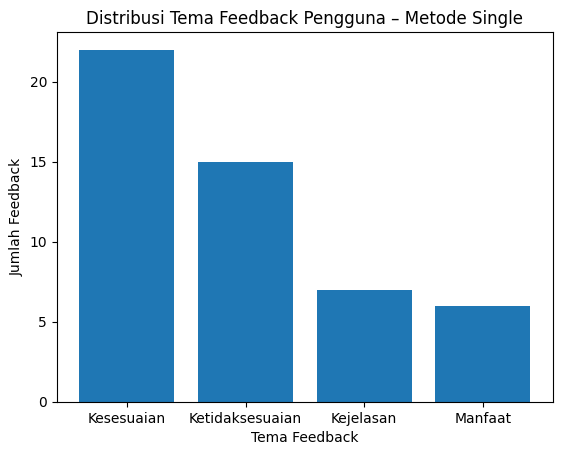

In [ ]:
themes_single = {
    'Kesesuaian': 22,
    'Ketidaksesuaian': 15,
    'Kejelasan': 7,
    'Manfaat': 6
}

plt.figure()
plt.bar(themes_single.keys(), themes_single.values())
plt.xlabel('Tema Feedback')
plt.ylabel('Jumlah Feedback')
plt.title('Distribusi Tema Feedback Pengguna – Metode Single')
plt.show()

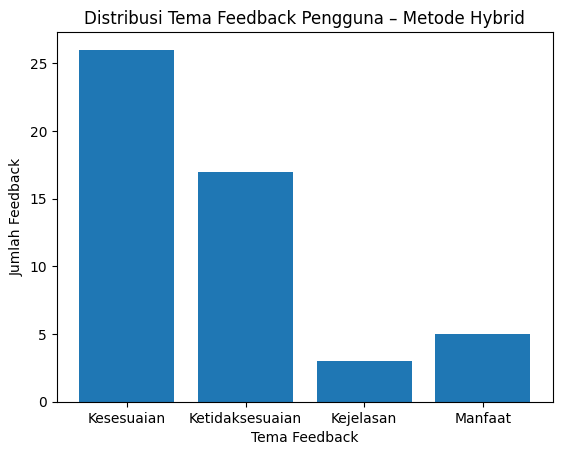

In [ ]:
themes_hybrid = {
    'Kesesuaian': 26,
    'Ketidaksesuaian': 17,
    'Kejelasan': 3,
    'Manfaat': 5
}

plt.figure()
plt.bar(themes_hybrid.keys(), themes_hybrid.values())
plt.xlabel('Tema Feedback')
plt.ylabel('Jumlah Feedback')
plt.title('Distribusi Tema Feedback Pengguna – Metode Hybrid')
plt.show()

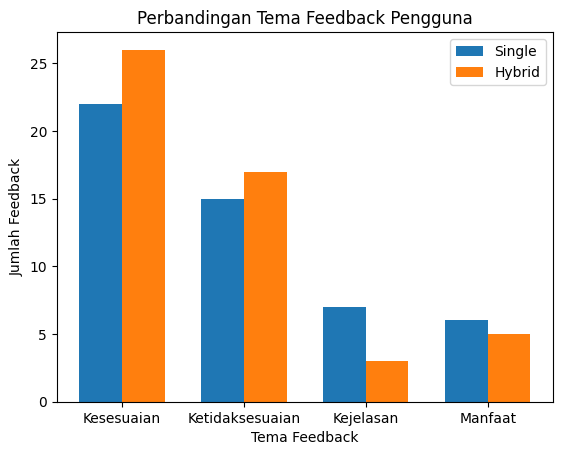

In [ ]:
labels = list(themes_single.keys())
single_values = list(themes_single.values())
hybrid_values = list(themes_hybrid.values())

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, single_values, width, label='Single')
plt.bar(x + width/2, hybrid_values, width, label='Hybrid')

plt.xlabel('Tema Feedback')
plt.ylabel('Jumlah Feedback')
plt.title('Perbandingan Tema Feedback Pengguna')
plt.xticks(x, labels)
plt.legend()
plt.show()

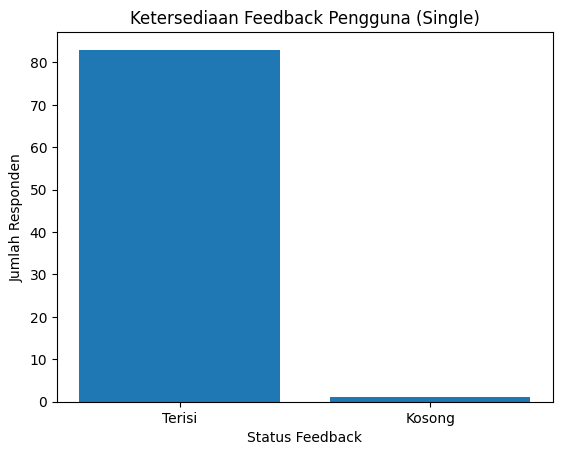

In [ ]:
feedback_status = {
    'Terisi': df['feedback_single'].notna().sum(),
    'Kosong': df['feedback_single'].isna().sum()
}

plt.figure()
plt.bar(feedback_status.keys(), feedback_status.values())
plt.xlabel('Status Feedback')
plt.ylabel('Jumlah Responden')
plt.title('Ketersediaan Feedback Pengguna (Single)')
plt.show()


# VISUALISASI DISTRIBUSI

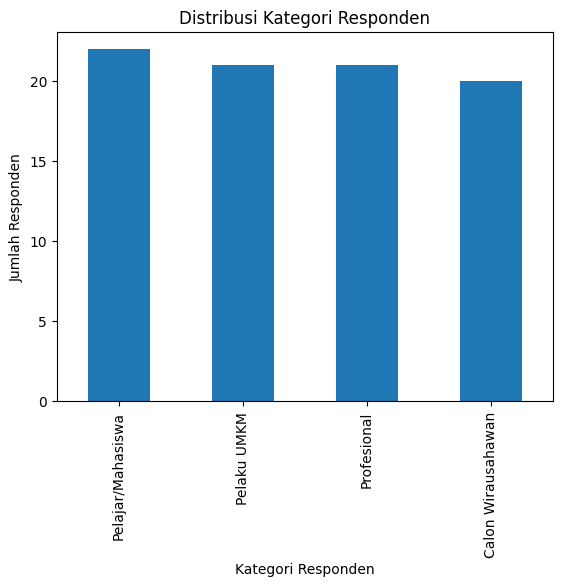

In [ ]:
kategori_counts = df['kategori'].value_counts()

plt.figure()
kategori_counts.plot(kind='bar')
plt.xlabel('Kategori Responden')
plt.ylabel('Jumlah Responden')
plt.title('Distribusi Kategori Responden')
plt.show()

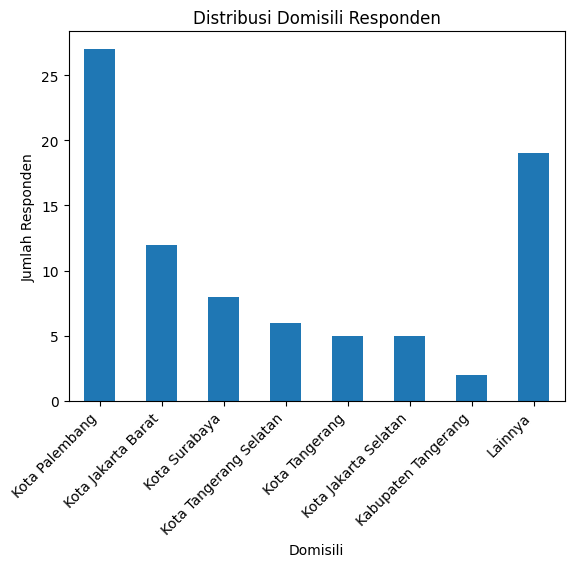

In [ ]:
domisili_counts = df['domisili'].value_counts()

top_n = 7
top_domisili = domisili_counts.head(top_n)
lainnya = domisili_counts.iloc[top_n:].sum()

domisili_plot = top_domisili.copy()
domisili_plot['Lainnya'] = lainnya

plt.figure()
domisili_plot.plot(kind='bar')
plt.xlabel('Domisili')
plt.ylabel('Jumlah Responden')
plt.title('Distribusi Domisili Responden')
plt.xticks(rotation=45, ha='right')
plt.show()

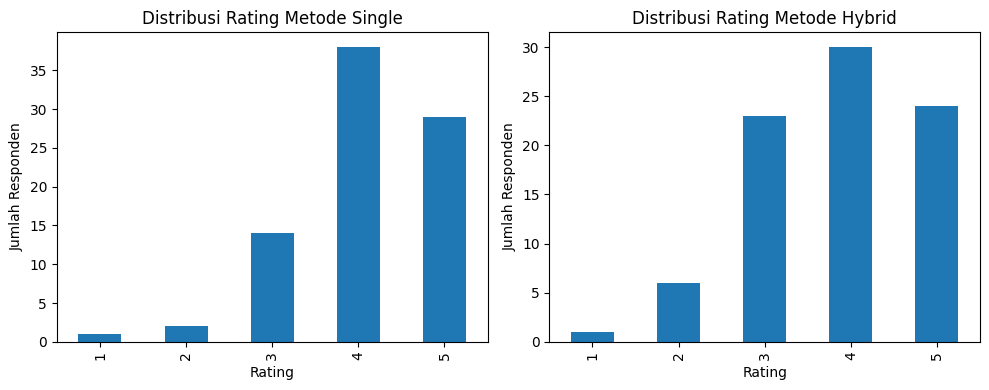

In [ ]:
rating_single_counts = df['rate_single'].value_counts().sort_index()
rating_hybrid_counts = df['rate_hybrid'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

rating_single_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribusi Rating Metode Single')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Jumlah Responden')

rating_hybrid_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribusi Rating Metode Hybrid')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Jumlah Responden')

plt.tight_layout()
plt.show()

# proposional

In [ ]:
def parse_list_safe(x):
    if pd.isna(x):
        return []
    return [i.strip() for i in str(x).split(',') if i.strip()]

In [ ]:
cols = [
    'top3_sector_single',
    'top3_sector_hybrid',
    'chosen_s_list',
    'chosen_h_list'
]

for c in cols:
    df[c] = df[c].apply(parse_list_safe)


In [ ]:
def count_match_top3(row, col_top3, col_choice):
    return len(set(row[col_top3]) & set(row[col_choice]))

In [ ]:
df['match_count_single'] = df.apply(
    lambda x: count_match_top3(x, 'top3_sector_single', 'chosen_s_list'),
    axis=1
)

df['match_count_hybrid'] = df.apply(
    lambda x: count_match_top3(x, 'top3_sector_hybrid', 'chosen_h_list'),
    axis=1
)


In [ ]:
df[['match_count_single', 'match_count_hybrid']].mean()


,0
match_count_single,1.119048
match_count_hybrid,1.083333


In [ ]:
df['match_count_single'].value_counts().sort_index()

,count
match_count_single,
0,4
1,67
2,12
3,1


In [ ]:
df['match_count_hybrid'].value_counts().sort_index()


,count
match_count_hybrid,
0,6
1,66
2,11
3,1


In [ ]:
df.groupby('match_count_single')['rate_single'].mean()

,rate_single
match_count_single,
0,4.250000
1,4.104478
2,4.250000
3,1.000000


In [ ]:
df.groupby('match_count_hybrid')['rate_hybrid'].mean()

,rate_hybrid
match_count_hybrid,
0,4.000000
1,3.712121
2,4.363636
3,5.000000


In [ ]:
df['match_count_single']

,match_count_single
0,1
1,1
2,1
3,1
4,1
...,...
79,1
80,1
81,1
82,1


In [ ]:
df['match_count_hybrid']

,match_count_hybrid
0,1
1,1
2,1
3,1
4,1
...,...
79,1
80,1
81,1
82,1


In [ ]:
K = 3  # jumlah rekomendasi

df['prop_match_single'] = df['match_count_single'] / K
df['prop_match_hybrid'] = df['match_count_hybrid'] / K

In [ ]:
df[['prop_match_single', 'prop_match_hybrid']].mean()

,0
prop_match_single,0.373016
prop_match_hybrid,0.361111


In [ ]:
df['prop_match_single'].value_counts().sort_index()

,count
prop_match_single,
0.000000,4
0.333333,67
0.666667,12
1.000000,1


In [ ]:
df['prop_match_hybrid'].value_counts().sort_index()

,count
prop_match_hybrid,
0.000000,6
0.333333,66
0.666667,11
1.000000,1


In [ ]:
bins = [0, 0.34, 0.68, 1.01]
labels = ['Rendah', 'Sedang', 'Tinggi']

df['level_single'] = pd.cut(df['prop_match_single'], bins=bins, labels=labels)
df['level_hybrid'] = pd.cut(df['prop_match_hybrid'], bins=bins, labels=labels)

In [ ]:
df['level_single'].value_counts()

,count
level_single,
Rendah,67
Sedang,12
Tinggi,1


In [ ]:
df['level_hybrid'].value_counts()

,count
level_hybrid,
Rendah,66
Sedang,11
Tinggi,1


In [ ]:
df.groupby('prop_match_single')['rate_single'].mean()

,rate_single
prop_match_single,
0.000000,4.250000
0.333333,4.104478
0.666667,4.250000
1.000000,1.000000


Pada metode single, peningkatan kecocokan sektor tidak secara langsung diikuti oleh peningkatan penilaian pengguna. Hal ini menunjukkan bahwa persepsi pengguna terhadap kualitas rekomendasi cenderung konsisten, terlepas dari jumlah sektor yang dianggap sesuai.

In [ ]:
df.groupby('prop_match_hybrid')['rate_hybrid'].mean()

,rate_hybrid
prop_match_hybrid,
0.000000,4.000000
0.333333,3.712121
0.666667,4.363636
1.000000,5.000000


Pada metode hybrid, semakin banyak sektor rekomendasi yang sesuai dengan preferensi pengguna, semakin tinggi penilaian yang diberikan. Hal ini menunjukkan bahwa metode hybrid lebih responsif terhadap tingkat relevansi rekomendasi.

# skripsi

In [ ]:
# jumlah responden
len(df)

84

In [ ]:

# statistik rating single
df['rate_single'].describe()

,rate_single
count,84.000000
mean,4.095238
std,0.844815
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:

# statistik rating hybrid
df['rate_hybrid'].describe()


,rate_hybrid
count,84.000000
mean,3.833333
std,0.967338
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df[['prop_match_single', 'prop_match_hybrid']].mean()


,0
prop_match_single,0.373016
prop_match_hybrid,0.361111


In [ ]:
df['prop_match_single'].value_counts(normalize=True).sort_index()

,proportion
prop_match_single,
0.000000,0.047619
0.333333,0.797619
0.666667,0.142857
1.000000,0.011905


In [ ]:
df['prop_match_hybrid'].value_counts(normalize=True).sort_index()

,proportion
prop_match_hybrid,
0.000000,0.071429
0.333333,0.785714
0.666667,0.130952
1.000000,0.011905


In [ ]:
(df['prop_match_single'].value_counts(normalize=True) * 100).round(1)

,proportion
prop_match_single,
0.333333,79.8
0.666667,14.3
0.000000,4.8
1.000000,1.2


In [ ]:
(df['prop_match_hybrid'].value_counts(normalize=True) * 100).round(1)

,proportion
prop_match_hybrid,
0.333333,78.6
0.666667,13.1
0.000000,7.1
1.000000,1.2


In [ ]:
# Single
df.groupby('prop_match_single')['rate_single'].mean()


,rate_single
prop_match_single,
0.000000,4.250000
0.333333,4.104478
0.666667,4.250000
1.000000,1.000000


In [ ]:
# Hybrid
df.groupby('prop_match_hybrid')['rate_hybrid'].mean()


,rate_hybrid
prop_match_hybrid,
0.000000,4.000000
0.333333,3.712121
0.666667,4.363636
1.000000,5.000000


In [ ]:
summary = pd.DataFrame({
    'Single': [
        df['rate_single'].mean(),
        df['rate_single'].median(),
        df['rate_single'].std(),
        df['prop_match_single'].mean()
    ],
    'Hybrid': [
        df['rate_hybrid'].mean(),
        df['rate_hybrid'].median(),
        df['rate_hybrid'].std(),
        df['prop_match_hybrid'].mean()
    ]
}, index=[
    'Rata-rata penilaian',
    'Median penilaian',
    'Standar deviasi penilaian',
    'Rata-rata kecocokan proporsional'
])

summary

,Single,Hybrid
Rata-rata penilaian,4.095238,3.833333
Median penilaian,4.000000,4.000000
Standar deviasi penilaian,0.844815,0.967338
Rata-rata kecocokan proporsional,0.373016,0.361111


In [ ]:
# ==============================
# ANALISIS KECOCOKAN & PERSEPSI
# SINGLE vs HYBRID (ONE CELL)
# ==============================

import pandas as pd

# ------------------------------
# 1. Distribusi jumlah kecocokan (0–3 sektor)
# ------------------------------
print("Distribusi Match Count - Single")
print(df['match_count_single'].value_counts().sort_index(), "\n")

print("Distribusi Match Count - Hybrid")
print(df['match_count_hybrid'].value_counts().sort_index(), "\n")


# ------------------------------
# 2. Rata-rata rating berdasarkan jumlah kecocokan
# ------------------------------
print("Rata-rata Rating per Match Count - Single")
print(df.groupby('match_count_single')['rate_single'].mean(), "\n")

print("Rata-rata Rating per Match Count - Hybrid")
print(df.groupby('match_count_hybrid')['rate_hybrid'].mean(), "\n")


# ------------------------------
# 3. Distribusi kecocokan proporsional (0.00, 0.33, 0.67, 1.00)
# ------------------------------
print("Distribusi Proporsional Match - Single")
print(df['prop_match_single'].value_counts().sort_index(), "\n")

print("Distribusi Proporsional Match - Hybrid")
print(df['prop_match_hybrid'].value_counts().sort_index(), "\n")


# ------------------------------
# 4. Kategorisasi tingkat kecocokan (Rendah–Sedang–Tinggi)
# ------------------------------
bins = [0, 0.34, 0.68, 1.01]
labels = ['Rendah', 'Sedang', 'Tinggi']

df['level_single'] = pd.cut(df['prop_match_single'], bins=bins, labels=labels)
df['level_hybrid'] = pd.cut(df['prop_match_hybrid'], bins=bins, labels=labels)

print("Kategori Tingkat Kecocokan - Single")
print(df['level_single'].value_counts(), "\n")

print("Kategori Tingkat Kecocokan - Hybrid")
print(df['level_hybrid'].value_counts(), "\n")


# ------------------------------
# 5. Hubungan kecocokan proporsional & rating
# ------------------------------
print("Rata-rata Rating berdasarkan Proporsional Match - Single")
print(df.groupby('prop_match_single')['rate_single'].mean(), "\n")

print("Rata-rata Rating berdasarkan Proporsional Match - Hybrid")
print(df.groupby('prop_match_hybrid')['rate_hybrid'].mean())


Distribusi Match Count - Single
match_count_single
0     4
1    67
2    12
3     1
Name: count, dtype: int64 

Distribusi Match Count - Hybrid
match_count_hybrid
0     6
1    66
2    11
3     1
Name: count, dtype: int64 

Rata-rata Rating per Match Count - Single
match_count_single
0    4.250000
1    4.104478
2    4.250000
3    1.000000
Name: rate_single, dtype: float64 

Rata-rata Rating per Match Count - Hybrid
match_count_hybrid
0    4.000000
1    3.712121
2    4.363636
3    5.000000
Name: rate_hybrid, dtype: float64 

Distribusi Proporsional Match - Single
prop_match_single
0.000000     4
0.333333    67
0.666667    12
1.000000     1
Name: count, dtype: int64 

Distribusi Proporsional Match - Hybrid
prop_match_hybrid
0.000000     6
0.333333    66
0.666667    11
1.000000     1
Name: count, dtype: int64 

Kategori Tingkat Kecocokan - Single
level_single
Rendah    67
Sedang    12
Tinggi     1
Name: count, dtype: int64 

Kategori Tingkat Kecocokan - Hybrid
level_hybrid
Rendah    66
Seda